# Chapter 2  - Exercise 10

Book An Introduction to Statistical Learning

Pag. 56 ~ 57

http://statlearning.com

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

###  10 (a)

In [2]:
names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX', 'PTRATIO', 'B','LSTAT', 'MEDV']

boston = pd.read_table('boston.data.txt', delim_whitespace=True, names=names)

boston.shape

(506, 14)

In [3]:
boston.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#### Data description
The Boston data set has 506 rows and 14 columns.

**crim**
per capita crime rate by town.

**zn**
proportion of residential land zoned for lots over 25,000 sq.ft.

**indus**
proportion of non-retail business acres per town.

**chas**
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

**nox**
nitrogen oxides concentration (parts per 10 million).

**rm**
average number of rooms per dwelling.

**age**
proportion of owner-occupied units built prior to 1940.

**dis**
weighted mean of distances to five Boston employment centres.

**rad**
index of accessibility to radial highways.

**tax**
full-value property-tax rate per $10,000.

**ptratio**
pupil-teacher ratio by town.

**black**
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

**lstat**
lower status of the population (percent).

**medv**
median value of owner-occupied homes in $1000s.

###  10 (b)

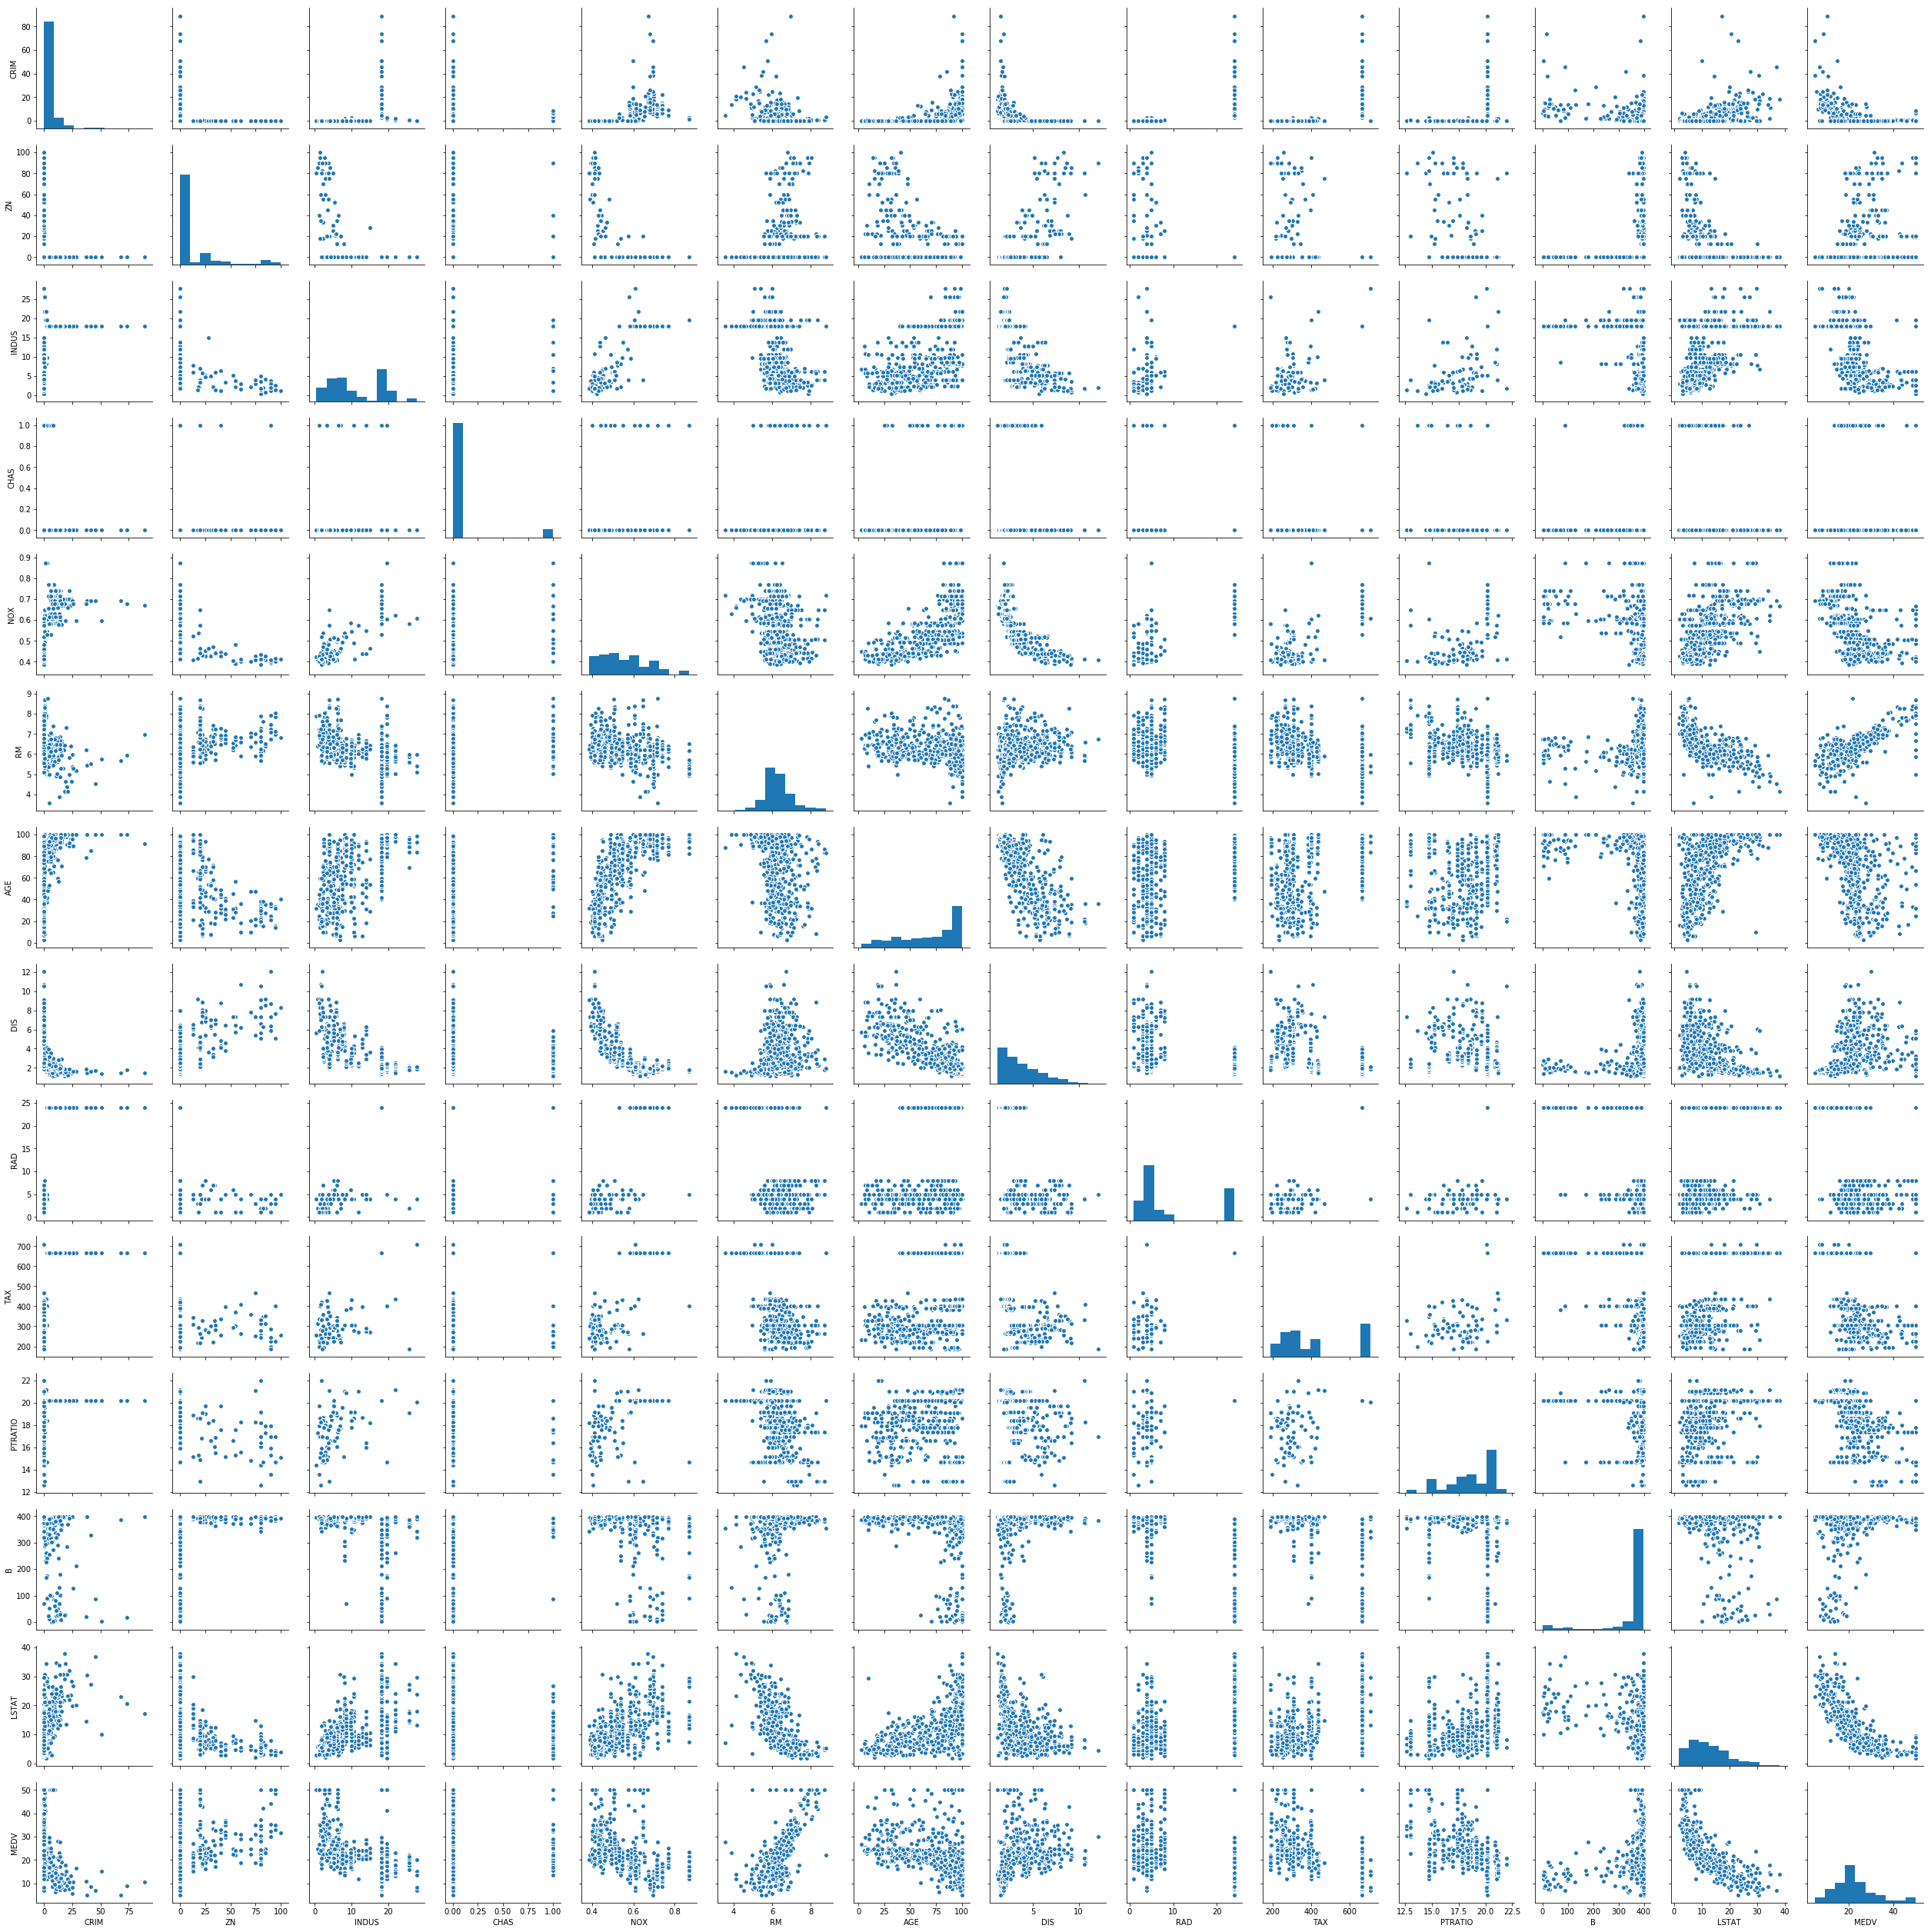

In [4]:
sns.pairplot(boston);

Almost all predictor have some correlation with all the dataset

###  10 (c)

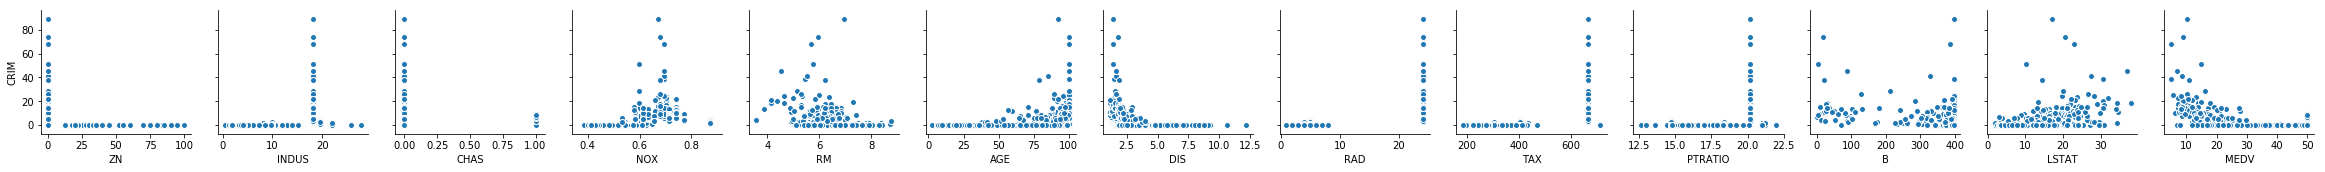

In [5]:
pp = sns.pairplot(data=boston,
                  y_vars=['CRIM'],
                  x_vars=['ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])

It seems that AGE, DIS, RAD, TAX and PTRATIO have some associated with CRIM

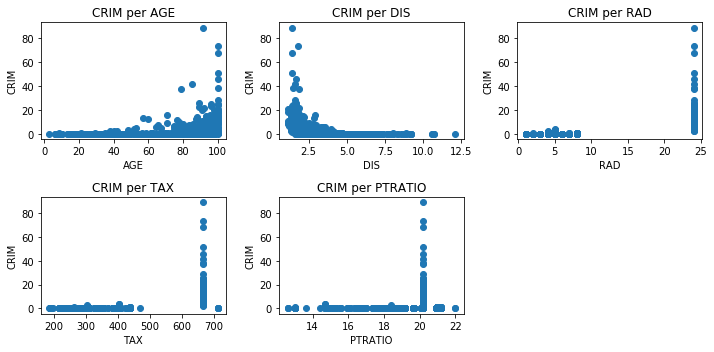

In [6]:
plt.figure(figsize=(10,5))

plt.subplot(231)
axis1 = plt.scatter(boston.AGE, boston.CRIM)
plt.xlabel('AGE')
plt.ylabel('CRIM')
plt.title('CRIM per AGE')

plt.subplot(232)
axis1 = plt.scatter(boston.DIS, boston.CRIM)
plt.xlabel('DIS')
plt.ylabel('CRIM')
plt.title('CRIM per DIS')

plt.subplot(233)
axis1 = plt.scatter(boston.RAD, boston.CRIM)
plt.xlabel('RAD')
plt.ylabel('CRIM')
plt.title('CRIM per RAD')

plt.subplot(234)
axis1 = plt.scatter(boston.TAX, boston.CRIM)
plt.xlabel('TAX')
plt.ylabel('CRIM')
plt.title('CRIM per TAX')

plt.subplot(235)
axis1 = plt.scatter(boston.PTRATIO, boston.CRIM)
plt.xlabel('PTRATIO')
plt.ylabel('CRIM')
plt.title('CRIM per PTRATIO')

plt.tight_layout()

plt.show()

The older the house, the higher the crime rate

More close to the Boston employment center, more crime rate

As accessibility to radial highways increases , the crime also increases

Higher tax, more crime

More pupil-teacher ratio, more crime

###  10 (d)

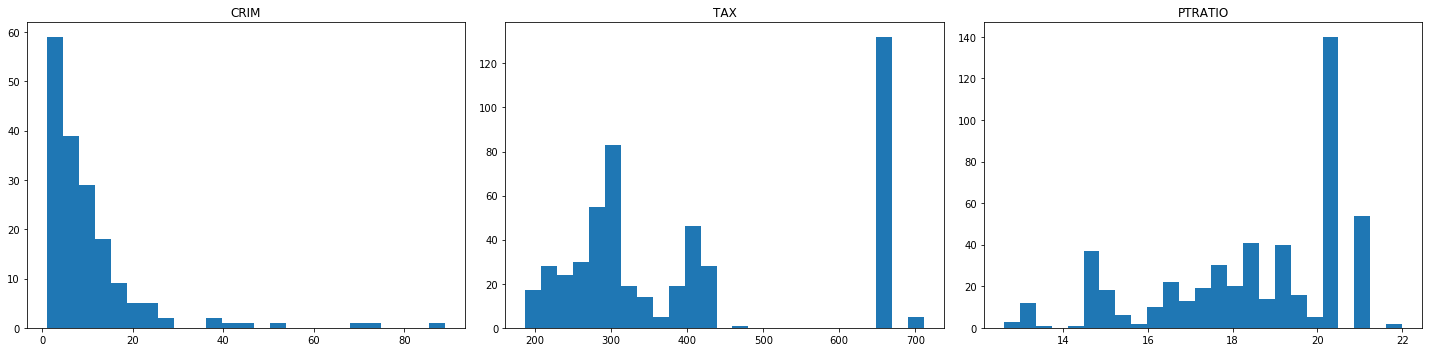

In [7]:
plt.figure(figsize=(20,5))

plt.subplot(131)
axis1 = plt.hist(boston.CRIM[boston.CRIM>1], bins=25)
plt.title('CRIM')

plt.subplot(132)
axis2 = plt.hist(boston.TAX, bins=25, )
plt.title('TAX')

plt.subplot(133)
axis3 = plt.hist(boston.PTRATIO, bins=25)
plt.title('PTRATIO')

plt.tight_layout()

plt.show()

Most cities have low crime rates, but  17 or 18 suburbs appear to have a crime rate > 20, reaching to 80

There is a peak around tax arund 660  but most of the values are between 200 and 450

The peak around 20,5 show a frequency of 140, but there are no other particularly one the data

###  10 (e)

In [8]:
boston[boston.CHAS == 1].shape

(35, 14)

35 suburbs

###  10 (f)

In [9]:
boston.PTRATIO.median()

19.05

###  10 (g)

In [10]:
boston[boston.MEDV == boston.MEDV.min()].transpose()

,398,405
CRIM,38.3518,67.9208
ZN,0.0000,0.0000
INDUS,18.1000,18.1000
CHAS,0.0000,0.0000
NOX,0.6930,0.6930
RM,5.4530,5.6830
AGE,100.0000,100.0000
DIS,1.4896,1.4254
RAD,24.0000,24.0000
TAX,666.0000,666.0000


Those two suburbs have a high CRIM, TAX and LSTAT, they are not bounded by the river and MEDV are at min.
although, the AGE is at max, the RAD is also at max

###  10 (h)

In [11]:
len(boston[boston.RM> 7])

64

In [12]:
len(boston[boston.RM> 8])

13

In [13]:
boston[boston.RM > 8].describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,0.718795,13.615385,7.078462,0.153846,0.539238,8.348538,71.538462,3.430192,7.461538,325.076923,16.361538,385.210769,4.310000,44.200000
std,0.901640,26.298094,5.392767,0.375534,0.092352,0.251261,24.608723,1.883955,5.332532,110.971063,2.410580,10.529359,1.373566,8.092383
min,0.020090,0.000000,2.680000,0.000000,0.416100,8.034000,8.400000,1.801000,2.000000,224.000000,13.000000,354.550000,2.470000,21.900000
25%,0.331470,0.000000,3.970000,0.000000,0.504000,8.247000,70.400000,2.288500,5.000000,264.000000,14.700000,384.540000,3.320000,41.700000
50%,0.520140,0.000000,6.200000,0.000000,0.507000,8.297000,78.300000,2.894400,7.000000,307.000000,17.400000,386.860000,4.140000,48.300000
75%,0.578340,20.000000,6.200000,0.000000,0.605000,8.398000,86.500000,3.651900,8.000000,307.000000,17.400000,389.700000,5.120000,50.000000
max,3.474280,95.000000,19.580000,1.000000,0.718000,8.780000,93.900000,8.906700,24.000000,666.000000,20.200000,396.900000,7.440000,50.000000


In [14]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Lower CRIM and LSTAT <br>
Higher TAX and AGE

# End Exercise 10